In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
N = 100
sample = sps.norm.rvs(loc=0, scale=1, size=N)

### Байесовские оценки в модели $N(\theta, 1)$

Оценка максимального правдоподобия для модели $N(\theta, 1)$ это $\overline X$.
При этом сопряженным априорным распределением будет $N(a,\sigma^2)$.
Тогда байесовскую оценку найдем как $(\frac{a}{\sigma^2}+\Sigma X_i)(\frac{1}{\sigma^2}+n)^{-1}$.

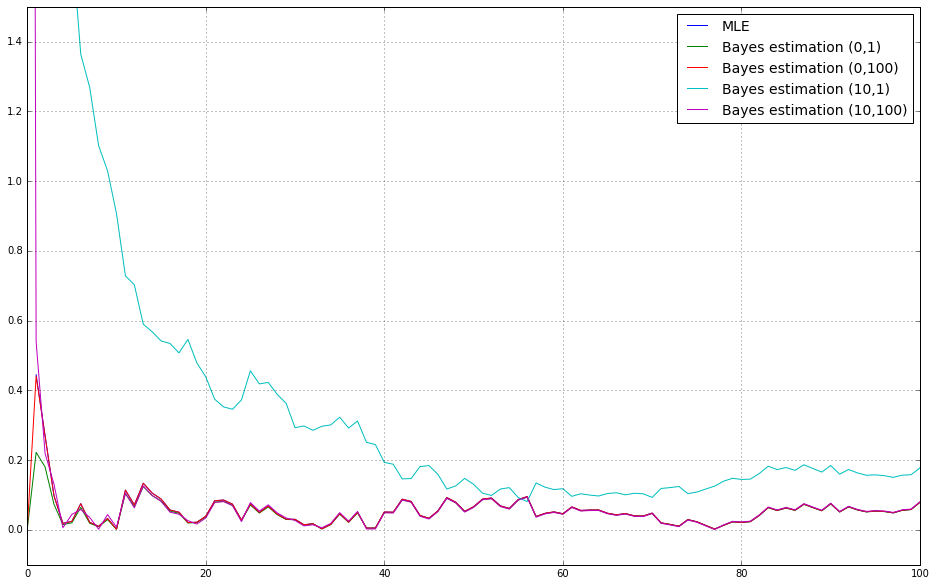

In [22]:
plt.figure(figsize=(16,10))

# Оценка методом макимального правдоподобия
max_likelihood_estimation = [abs(sample[:n].mean()) for n in range(1, N + 1)]
plt.plot(range(1, N + 1), max_likelihood_estimation, label='MLE')

# Байесовская оценка
for (mean, var) in [(0, 1), (0, 100), (10, 1), (10, 100)]:
    bayes_estimation = [abs(mean / var + sample[:n].sum()) / (1 / var + n)
                        for n in range (N + 1)]
    plt.plot(range(N + 1), bayes_estimation, 
             label='Bayes estimation ({},{})'.format(mean, var))

plt.grid()
plt.ylim(-0.1, 1.5)
plt.legend(fontsize=14)
plt.show()
    

В данном случае наилучшая байесовская оценка достигается при априорном $N(0, 1)$. Однако, на самом деле результат разнится от выборки к выборке. Ясно лишь, что на небудольшом наборе данных байесовские оценки лучше всегда.

### Байесовские оценки в модели $N(0, \theta)$

Оценка максимального правдоподобия для модели $N(\theta, 1)$ это $\overline {X^2}$.
Cопряженным априорным распределением будет $Inv$-$Gamma(\alpha,\beta)$.
Тогда байесовскую оценку найдем как $\frac{2\beta+\Sigma X_i^2}{2\alpha+n-2}$.

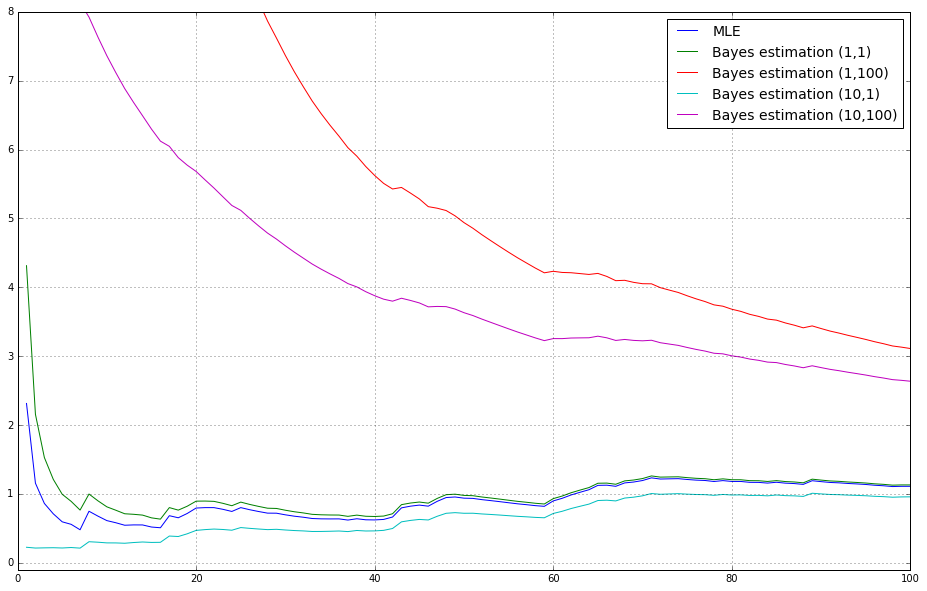

In [24]:
plt.figure(figsize=(16,10))

max_likelihood_estimation = [abs((sample[:n] ** 2).mean()) for n in range(1, N + 1)]
plt.plot(range(1, N + 1), max_likelihood_estimation, label='MLE')

for (alpha, beta) in [(1, 1), (1, 100), (10, 1), (10, 100)]:
    bayes_estimation = [abs((2 * beta + (sample[:n] ** 2).sum()) / (2 * alpha + n - 2))
                        for n in range(1, N + 1)]
    plt.plot(range(1, N + 1), bayes_estimation, 
             label='Bayes estimation ({},{})'.format(alpha, beta))
    
plt.grid()
plt.ylim(-0.1, 8)
plt.legend(fontsize=14)
plt.show()


На графике видим, что лучшей является оценка при ариорном $Inv$-$Gamma(10, 1)$.